# Exam 3
## Neural Networks

#### Please enter your firstname and lastname below.

- Firstname: Clémentine
- Lastname: BLEUZE

#### Content

- A. Operations on tensors. Exercise 1 - 5 
- B. Preparing the data. Exercise 6 - 11 
- C. Defining and training a multilayer perceptron for binary classification. Exercise 12-17


In [272]:
import torch
import numpy as np

### A. Operations on tensors

In [273]:
tensor = torch.ones(4, 4)
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


###### Exercise 1  (2 points)
- Modify `tensor` so that its new value is 

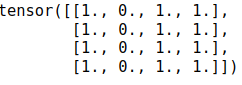

In [274]:
# change the second column to 0 values only
for row in tensor:
    row[1] = 0

print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### Exercise 2  (2 points)
- Transform t to a tensor of size (2,6)

In [275]:
t = torch.randn(3, 4)
t

tensor([[ 0.8641,  0.7576, -1.3882,  0.8332],
        [ 0.7718,  0.7445,  0.0949, -0.4174],
        [ 0.5265, -0.8868, -0.1408, -1.0355]])

In [276]:
# we keep the same values inside but change the shape
t = t.view(2, 6)
print(t)

tensor([[ 0.8641,  0.7576, -1.3882,  0.8332,  0.7718,  0.7445],
        [ 0.0949, -0.4174,  0.5265, -0.8868, -0.1408, -1.0355]])


#### Exercise 3 (2 points)
- Combine t1 and t2 in such a way that the result is 

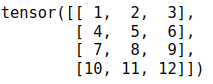

In [277]:
t1 = torch.tensor([[1,2,3],[4,5,6]])
t2 = torch.tensor([[7,8,9],[10,11,12]])

In [278]:
combined_tensor = torch.cat((t1, t2), dim=0)
print(combined_tensor)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])


#### Exercise 4 (2 points)
- Create a tensor of random integers of size (3,6) and display its transpose

In [279]:
# create the random tensor of integers, we arbitrarily choose to restrict to integers between 0-10
random_t = torch.randint(low = 0, high = 10, size = (3,6))
print(random_t)

# transpose it
transposed_t = random_t.t()
print("\nTransposed:\n", transposed_t)

tensor([[5, 2, 7, 4, 8, 8],
        [6, 8, 4, 0, 5, 2],
        [2, 8, 2, 8, 0, 9]])

Transposed:
 tensor([[5, 6, 2],
        [2, 8, 8],
        [7, 4, 2],
        [4, 0, 8],
        [8, 5, 0],
        [8, 2, 9]])


#### Exercise 5 (2 points)
- Resize the transpose tensor from the previous exercise to a tensor of size (3,2,3)

In [280]:
reshaped_t = transposed_t.reshape(3, 2, 3)
print("\nReshaped:\n", reshaped_t)


Reshaped:
 tensor([[[5, 6, 2],
         [2, 8, 8]],

        [[7, 4, 2],
         [4, 0, 8]],

        [[8, 5, 0],
         [8, 2, 9]]])


## B. Preparing the Data

#### Exercise 6 ( 2 points)
- Import the `names.csv` file into a Pandas dataframe

In [281]:
import pandas as pd

# import data and visualize the first rows and the shape
df = pd.read_csv("names.csv")
print(df.shape)
df.head()

(4327, 2)


,Name,Language
0,Alden,1
1,Alder,1
2,Aldersley,1
3,Alderson,1
4,Aldred,1


#### Exercise 7 (4 points)
- Create a char2int dictionary
- the dictionary should map  `<eos>` to 0, '<start>' to 1 and all remaining letters of the alphabet to distinct integers

In [282]:
import string
alphabet = list(string.ascii_lowercase)
print(alphabet)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [283]:
# begin with the alphabet symbols
# I choose to map a with 2, b with 3, etc.
char2int = {letter:idx for idx, letter in zip(range(2, len(alphabet)+2), alphabet)}

# now add <eos> and " (empty string / unknown token)
char2int["<eos>"] = 0
char2int[""] = 1

In [284]:
print(char2int)

{'a': 2, 'b': 3, 'c': 4, 'd': 5, 'e': 6, 'f': 7, 'g': 8, 'h': 9, 'i': 10, 'j': 11, 'k': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'w': 24, 'x': 25, 'y': 26, 'z': 27, '<eos>': 0, '': 1}


####  Exercise 8 (2 points)
- Create the reverse dictionary `int2char` which maps integers to characters

In [285]:
int2char = {idx:letter for letter, idx in char2int.items()}

In [286]:
# check that the mapping is correct
print(char2int["c"])

4


In [287]:
print(int2char[4])

c


####  Exercise 9 (4 points)

- Using your char2int dictionary, define a function `convert_name_to_integers` which maps a name to the corresponding list of integers
- Apply this function to the names in the  `Name` column of  your dataframe
- Store the result in a new column named `Int_Names` and add this column to your dataframe

The result should look like this:
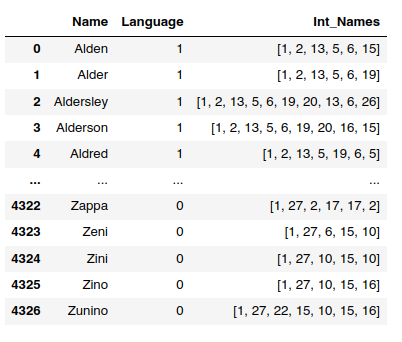

In [288]:
def convert_name_to_integers(name:str):
    """
    Returns the mapping from a name to a list of integers
    """

    # first, we lower the name because our mapping doesn't account for capital letters
    name = name.lower()
    int_list = []

    # for every character in the name, we add the corresponding integer
    for char in name:
        if char in char2int:
            int_list.append(char2int[char])
        else:
            # if the character is not in the mapping, we consider it as the unknown token / empty string
            int_list.append(char2int[""])
            
    
    return int_list


In [289]:
# check that the function works
print(convert_name_to_integers("Johnàtan"))

[11, 16, 9, 15, 1, 21, 2, 15]


In [290]:
# apply to all the names in the dataframe
df["Int_name"] = df["Name"].apply(convert_name_to_integers)

In [291]:
df.head()

,Name,Language,Int_name
0,Alden,1,"[2, 13, 5, 6, 15]"
1,Alder,1,"[2, 13, 5, 6, 19]"
2,Aldersley,1,"[2, 13, 5, 6, 19, 20, 13, 6, 26]"
3,Alderson,1,"[2, 13, 5, 6, 19, 20, 16, 15]"
4,Aldred,1,"[2, 13, 5, 19, 6, 5]"


####  Exercise 9 (2 points)
- Checking by converting a name both ways
- Convert the Name in the first row of the dataframe into a list of integers using your char2int dictionary
- Convert the result back to a name using your int2char dictionary: you should get the lower case form of the initial name back 

In [292]:
# we'll define the reverse function to go from integers to names
def convert_integers_to_name(int_list:list):
    """
    Returns the mapping from a list of integers to a name
    """

    name = ""

    # for every integer in the list, we add the corresponding character
    for integer in int_list:
        name += int2char[integer]
    
    return name

In [293]:
# check on the first name
ex_name = df["Name"][0]
int_name = convert_name_to_integers(ex_name)
str_name = convert_integers_to_name(int_name)

print(f"Initial name: {ex_name}")
print(f"--> Conversion to ints: {int_name}")
print(f"--> Conversion back to string: {str_name}")

Initial name: Alden
--> Conversion to ints: [2, 13, 5, 6, 15]
--> Conversion back to string: alden


####  Exercise 10 (3  points)
- Print out the histogram of names length

In [294]:
# first we add a new column with the lengths of the names
df["Length"] = df["Int_name"].apply(lambda x: len(x))
df.head()

,Name,Language,Int_name,Length
0,Alden,1,"[2, 13, 5, 6, 15]",5
1,Alder,1,"[2, 13, 5, 6, 19]",5
2,Aldersley,1,"[2, 13, 5, 6, 19, 20, 13, 6, 26]",9
3,Alderson,1,"[2, 13, 5, 6, 19, 20, 16, 15]",8
4,Aldred,1,"[2, 13, 5, 19, 6, 5]",6


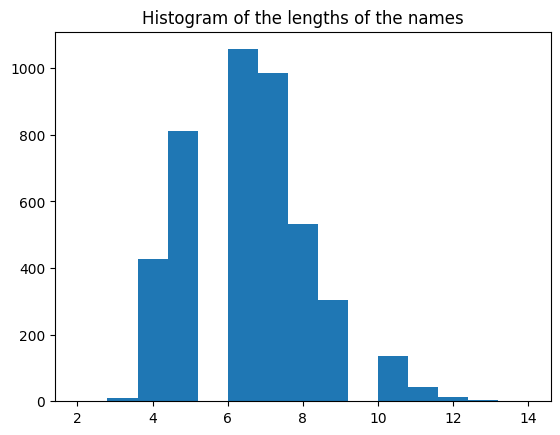

In [295]:
# now we plot the histogram of the lengths
import matplotlib.pyplot as plt

plt.hist(df["Length"], bins = 15)
plt.title("Histogram of the lengths of the names")
plt.show()

####  Exercise 11 (2 points)
- Get the maximum length of a name

In [296]:
max_length = df["Length"].max()
print(f"Maximum length: {max_length}")

Maximum length: 14


## C. Defining and Training a MultiLayer Perceptron

####  Exercise 12 (8 points)
- Create X and Y tensors
- X should be a tensor of floats
- Y should be a tensor of integers
- X should contain the list of names after conversion to integer format (cf. Exercise 9)
- Y should be the list of labels given by the `Language` column of the csv file

In [297]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [298]:
# create tensor X
# the first dimension is the number of names
# the second dimension is the maximum length of the names + 1 because of the <eos> token

X = torch.zeros(len(df["Name"]), max_length+1).float()

In [299]:
# create tensor Y
# the first dimension is also the number of names
# but we only have one label per name, so the second dimension is 1

Y = torch.zeros(len(df["Name"]), 1).long()

In [300]:
# now we can fill the tensors
for i, (int_name, lang) in enumerate(zip(df["Int_name"], df["Language"])):
    
    # name represented as integers
    X[i, :len(int_name)] = torch.tensor(int_name)
    # actually, no need to add the int representation of <eos>, because it is mapped to 0, which is already
    # the default value of the tensor
    
    # language label as one-hot encoding
    Y[i] = torch.tensor([lang])

In [301]:
print(X)

tensor([[ 2., 13.,  5.,  ...,  0.,  0.,  0.],
        [ 2., 13.,  5.,  ...,  0.,  0.,  0.],
        [ 2., 13.,  5.,  ...,  0.,  0.,  0.],
        ...,
        [27., 10., 15.,  ...,  0.,  0.,  0.],
        [27., 10., 15.,  ...,  0.,  0.,  0.],
        [27., 22., 15.,  ...,  0.,  0.,  0.]])


In [302]:
print(Y)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])


#### Exercise  13 (3 points)
- Create train and test data
- Split X into two parts, one called X_train which consists of the first 3000 items and the other called X_valid which includes the rest of the data
- Do the same for Y

In [303]:
X_train = X[:3000]
X_valid = X[3000:]
Y_train = Y[:3000]
Y_valid = Y[3000:]

print(X_train.shape, X_valid.shape)
print(Y_train.shape, Y_valid.shape)

torch.Size([3000, 15]) torch.Size([1327, 15])
torch.Size([3000, 1]) torch.Size([1327, 1])


####  Exercise 14  (3  points)
- Create batches 

In [304]:
# we create batches with dataloader
from torch.utils.data import TensorDataset, DataLoader
batch_size = 32
# the TensorDataset is a ready to use class to represent your data as list of tensors. 
# Note that input_features and labels must match on the length of the first dimension
train_set = TensorDataset(X_train, Y_train)
valid_set = TensorDataset(X_valid, Y_valid)

# DataLoader shuffles and batches the data and load its in parallel using multiprocessing workers

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

####  Exercise 15 (5 points)
- Define a multi layer perceptron consisting of 2 linear layers and whose output is computed by applying 
   - (i) the first linear layer to the input
   - (ii) a tanh activation function to the output of (i)
   - (ii) the second linear layer to the output of (ii)
 - The output layer shold be of size 2 (for binary classification)

In [305]:
# create a multi layer perceptron of 2 linear layers for binary classification
class MLP(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        
        # first layer
        self.l1 = nn.Linear(input_size, hidden_size)
        # second layer 
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):

        # first layer is applied to the input
        x = self.l1(x)
        # activation using the hyperbolic tangent
        x = torch.tanh(x)
        # second layer
        x = self.l2(x)
        # use the softmax to map the output to a probability distribution and decide a class (0 or 1)
        x = torch.softmax(x, dim=1)
        
        return x

In [306]:
mlp = MLP(input_size = max_length + 1,
          hidden_size = 128,
          output_size = 2)

device = torch.device("cpu")
mlp.to(device)

MLP(
  (l1): Linear(in_features=15, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=2, bias=True)
)

####  Exercise 16  (4 points)
- Define a training loop for your network

In [307]:
# define a training loop for the MLP
def train(model, train_loader, num_epochs):
    
    # criterion and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # loop over the epochs   
    for epoch in range(num_epochs):
        
        # set the model in training mode
        model.train()
        # initialize the total_loss to 0
        total_loss = 0

        # iterate over batches
        for bn, batch in enumerate(train_loader):
            x, y = batch
                
            # reset the gradients
            optimizer.zero_grad()

            # predict the batch scores
            y_scores = model(x)
            
            # convert the labels to one hot encoding in order to perform the loss computation
            y = [[1,0] if i == 0 else [0,1] for i in y]
            y = torch.tensor(y).float()
            
            # compute the loss
            loss = criterion(y_scores, y)

            # Compute the gradients (backpropagation)
            loss.backward()

            # Update the weights (optimization)
            optimizer.step()

            # Update the batch loss
            total_loss += loss.item()

            print(f'Epoch {epoch + 1}/{num_epochs}, batch num {bn} | Loss: {loss.item():.4f}')
        
        print("#"*20)


####  Exercise 17  ( 2 points)
- Train your network

In [308]:
train(mlp, train_loader, num_epochs=10)

Epoch 1/10, batch num 0 | Loss: 0.5915
Epoch 1/10, batch num 1 | Loss: 0.4902
Epoch 1/10, batch num 2 | Loss: 0.4325
Epoch 1/10, batch num 3 | Loss: 0.3489
Epoch 1/10, batch num 4 | Loss: 0.2822
Epoch 1/10, batch num 5 | Loss: 0.2536
Epoch 1/10, batch num 6 | Loss: 0.2115
Epoch 1/10, batch num 7 | Loss: 0.1554
Epoch 1/10, batch num 8 | Loss: 0.1530
Epoch 1/10, batch num 9 | Loss: 0.0999
Epoch 1/10, batch num 10 | Loss: 0.1119
Epoch 1/10, batch num 11 | Loss: 0.0788
Epoch 1/10, batch num 12 | Loss: 0.0696
Epoch 1/10, batch num 13 | Loss: 0.0582
Epoch 1/10, batch num 14 | Loss: 0.0467
Epoch 1/10, batch num 15 | Loss: 0.0425
Epoch 1/10, batch num 16 | Loss: 0.0350
Epoch 1/10, batch num 17 | Loss: 0.0331
Epoch 1/10, batch num 18 | Loss: 0.0256
Epoch 1/10, batch num 19 | Loss: 0.0236
Epoch 1/10, batch num 20 | Loss: 0.0254
Epoch 1/10, batch num 21 | Loss: 0.0253
Epoch 1/10, batch num 22 | Loss: 0.0216
Epoch 1/10, batch num 23 | Loss: 0.0231
Epoch 1/10, batch num 24 | Loss: 0.0161
Epoch 1/10

We can see that there is initally a dimension mismatch between y_scores and y, which makes the computation of the loss impossible. This is the reason why I changed Y's representation as one-hot encodings. So, label 0 is represented as [1, 0] and label 1 as [0, 1]. 
We see a decreasing loss on the train set, which seems good.

In [309]:
# print the validation loss
criterion = nn.BCELoss()

mlp.eval()
with torch.no_grad():
    y_pred_test = mlp(X_valid)

    # change the labels to one-hot encoding to compute the loss
    Y_valid = [[1,0] if i == 0 else [0,1] for i in Y_valid]
    Y_valid = torch.tensor(Y_valid).float()

    print('Validation set loss: ', criterion(y_pred_test, Y_valid))

Validation set loss:  tensor(5.1569)
